# Case Delivery - Data Analyst

Considere uma empresa bem estabelecida que atua no setor de varejo de alimentos. Atualmente, eles têm cerca de vários milhares de clientes registrados e atendem quase um milhão de consumidores por ano. Eles vendem produtos de 5 grandes categorias: vinhos, carnes, frutas exóticas, peixes especialmente preparados e produtos doces. Estes podem ser divididos ainda mais em produtos de *gold* e regulares. Os clientes podem encomendar e adquirir produtos por meio de 3 canais de vendas: lojas físicas, catálogos e site da empresa. Globalmente, a empresa teve receitas sólidas e uma linha de fundo saudável nos últimos 3 anos, mas as perspectivas de crescimento dos lucros para os próximos 3 anos não são promissoras... Por esse motivo, várias iniciativas estratégicas estão sendo consideradas para inverter essa situação. Um deles é melhorar o desempenho das atividades de marketing, com foco especial em campanhas de marketing.

## Importando a base de dados

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import imblearn
#from ydata_profiling import ProfileReport

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
    'Imbalanced-Learn': imblearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Imbalanced-Learn     |     0.11.0
Matplotlib           |      3.8.2
NumPy                |     1.26.2
Pandas               |      2.1.3
Scikit-Learn         |      1.3.2
Seaborn              |     0.13.0

Versão do Python: 3.12.0


In [2]:
import pandas as pd

DATA = '../Data/ml_project1_data.csv'

df = pd.read_csv(DATA, sep='\t')

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#Analisando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):
    
    display(df.describe())

ID  Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  \
count  2240.00     2240.00   2216.00  2240.00   2240.00  2240.00   2240.00   
mean   5592.16     1968.81  52247.25     0.44      0.51    49.11    303.94   
std    3246.66       11.98  25173.08     0.54      0.54    28.96    336.60   
min       0.00     1893.00   1730.00     0.00      0.00     0.00      0.00   
25%    2828.25     1959.00  35303.00     0.00      0.00    24.00     23.75   
50%    5458.50     1970.00  51381.50     0.00      0.00    49.00    173.50   
75%    8427.75     1977.00  68522.00     1.00      1.00    74.00    504.25   
max   11191.00     1996.00 666666.00     2.00      2.00    99.00   1493.00   

       MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2240.00          2240.00          2240.00           2240.00   
mean       26.30           166.95            37.53             27.06   
std        39.77           225.72            54.63             41.28   
min         0.00             0.00             0.00              0.00   
25%         1.00            16.00             3.00              1.00   
50%         8.00            67.00            12.00              8.00   
75%        33.00           232.00            50.00             33.00   
max       199.00          1725.00           259.00            263.00   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count       2240.00            2240.00          2240.00              2240.00   
mean          44.02               2.33             4.08                 2.66   
std           52.17               1.93             2.78                 2.92   
min            0.00               0.00             0.00                 0.00   
25%            9.00               1.00             2.00                 0.00   
50%           24.00               2.00             4.00                 2.00   
75%           56.00               3.00             6.00                 4.00   
max          362.00              15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2240.00            2240.00       2240.00       2240.00   
mean                5.79               5.32          0.07          0.07   
std                 3.25               2.43          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
count       2240.00       2240.00       2240.00   2240.00        2240.00   
mean           0.07          0.06          0.01      0.01           3.00   
std            0.26          0.25          0.11      0.10           0.00   
min            0.00          0.00          0.00      0.00           3.00   
25%            0.00          0.00          0.00      0.00           3.00   
50%            0.00          0.00          0.00      0.00           3.00   
75%            0.00          0.00          0.00      0.00           3.00   
max            1.00          1.00          1.00      1.00           3.00   

       Z_Revenue  Response  
count    2240.00   2240.00  
mean       11.00      0.15  
std         0.00      0.36  
min        11.00      0.00  
25%        11.00      0.00  
50%        11.00      0.00  
75%        11.00      0.00  
max        11.00      1.00

In [5]:
df.describe(exclude="number")

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# Análise Exploratória

In [7]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df)

#profile.to_file("../Reports/eda.html")

In [8]:
df = df.dropna()

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [9]:
#Usar a coluna de data para criar uma coluna de quantos dias esses clientes estão cadastrados pois uma coluna de data não é muito útil na análise

df['DaysSinceEnrolled'] = df['Dt_Customer'].max() - df['Dt_Customer']
df['DaysSinceEnrolled'] = df['DaysSinceEnrolled'].dt.days

df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-02-10       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  DaysSinceEnrolled  
0         11         1                663  
1         11         0                113  
2         11         0                312  
3         11         0                139  
4         11         0                161  

[5 rows x 30 columns]

In [10]:
df['YearsSinceEnrolled'] = df['DaysSinceEnrolled']//365

In [11]:
df['YearsSinceEnrolled'].value_counts()

YearsSinceEnrolled
0    1144
1    1072
Name: count, dtype: int64

In [12]:
df['Age'] = df['Dt_Customer'].max().year - df['Year_Birth']

In [13]:
df['Age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

## Entendendo a distribuição de idade

In [14]:
#Grupos de Idade
#Adulto_Jovem: 18-30
#Adulto: 31-45
#Adulto_Senior: 46-60
#Idoso: 61-

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[18,30,45,60, df['Age'].max()],
                        labels=['18-30','31-45','46-60','61+'],
                        include_lowest=True)

In [15]:
df['AgeGroup'].value_counts()

AgeGroup
31-45    965
46-60    727
61+      267
18-30    257
Name: count, dtype: int64

In [16]:
df.columns[df.columns.str.startswith('Mnt')]

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [17]:
#Analisando as colunas Mnt
df.loc[:, df.columns.str.startswith('Mnt')]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2216 rows x 6 columns]

In [18]:
df['MntTotal'] = (df['MntFishProducts']+df['MntWines']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds'])

df['MntProds'] = (df['MntFishProducts']+df['MntWines']+df['MntMeatProducts']+df['MntSweetProducts'])

In [19]:
#Criando uma coluna de qtd dependente juntando as colunas crianças e adolecentes, e uma flag se tem dependente ou não
df['Children'] = df['Kidhome'] + df['Teenhome']

df['HasChildren'] = df['Children'].apply(lambda x: 1 if x>0 else 0)

In [20]:
df['HasChildren'].value_counts()

HasChildren
1    1583
0     633
Name: count, dtype: int64

In [21]:
#Agrupando os Status entre Solteriro ou Casado
df['Marital_Status'] = df['Marital_Status'].replace(
    {
        'Alone': 'Single',
        'Absurd': 'Single',
        'YOLO': 'Single',
        'Together': 'Partner',
        'Married': 'Partner',
        'Widow': 'Single',
        'Single': 'Single',
        'Divorced': 'Single'
    }
    )

In [22]:
df['Marital_Status'].value_counts()

Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64

In [23]:
df['AcceptedCmpTotal'] = (df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5'])

df['HasAcceptedCmp'] = df['AcceptedCmpTotal'].apply(lambda x: 1 if x>0 else 0)

In [24]:
df['AcceptedCmpTotal'].value_counts()

AcceptedCmpTotal
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64

In [25]:
df['HasAcceptedCmp'].value_counts()

HasAcceptedCmp
0    1757
1     459
Name: count, dtype: int64

In [26]:
df.columns[df.columns.str.startswith('Num')]

Index(['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [27]:
df['NumTotalPurchases'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases']

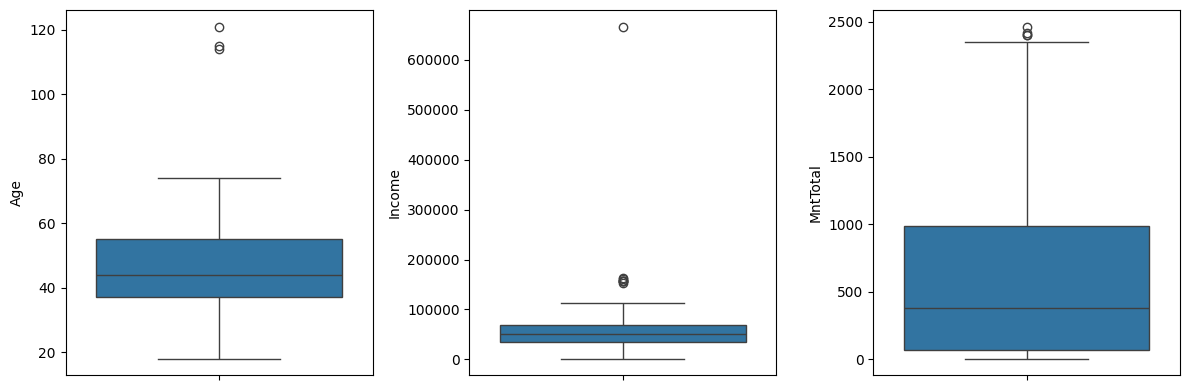

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

search_outliers = ['Age','Income','MntTotal']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), tight_layout=True)

for i, colum in enumerate(search_outliers):
    sns.boxplot(y=colum, data=df, ax=axs[i]) 

plt.show()    

## Verificando os outliers

In [29]:
#Verificar os outliers

from Funcoes_Auxiliares import inspect_outliers

inspect_outliers(df,'Age')

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle         Single  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD        Partner  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
192  2013-09-26       99        15  ...                   0  114       61+   
239  2014-05-17       23         8  ...                   0  121       61+   
339  2013-09-26       36       755  ...                   0  115       61+   

     MntTotal  MntProds  Children  HasChildren  AcceptedCmpTotal  \
192        59        34         1            1                 0   
239        22        20         1            1                 0   
339      1709      1485         0            0                 1   

     HasAcceptedCmp  NumTotalPurchases  
192               0                  5  
239               0                  3  
339               1                 14  

[3 rows x 40 columns]

In [30]:
inspect_outliers(df,'Income')

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Partner  157243.0        0   
617    1503        1976         PhD        Partner  162397.0        1   
655    5555        1975  Graduation         Single  153924.0        0   
687    1501        1982         PhD        Partner  160803.0        0   
1300   5336        1971      Master        Partner  157733.0        1   
1653   4931        1977  Graduation        Partner  157146.0        0   
2132  11181        1949         PhD        Partner  156924.0        0   
2233   9432        1977  Graduation        Partner  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  \
164          1  2014-03-01       98        20  ...                   0   41   
617          1  2013-06-03       31        85  ...                   1   38   
655          0  2014-02-07       81         1  ...                   0   39   
687          0  2012-08-04       21        55  ...                   1   32   
1300         0  2013-06-04       37        39  ...                   1   43   
1653         0  2013-04-29       13         1  ...                   1   37   
2132         0  2013-08-29       85         2  ...                   0   65   
2233         0  2013-06-02       23         9  ...                   1   37   

      AgeGroup  MntTotal  MntProds  Children  HasChildren  AcceptedCmpTotal  \
164      31-45      1606      1605         1            1                 0   
617      31-45       106       104         2            1                 0   
655      31-45         5         4         0            0                 0   
687      31-45      1701      1697         0            0                 0   
1300     31-45        58        50         1            1                 0   
1653     31-45      1730      1729         0            0                 0   
2132       61+         7         6         0            0                 0   
2233     31-45        48        36         1            1                 0   

      HasAcceptedCmp  NumTotalPurchases  
164                0                 22  
617                0                  1  
655                0                  0  
687                0                 29  
1300               0                  2  
1653               0                 28  
2132               0                  0  
2233               0                  7  

[8 rows x 40 columns]

In [31]:
inspect_outliers(df,'MntTotal')

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
987   4580        1969  Graduation        Partner  75759.0        0         0   
1052  4475        1949         PhD        Partner  69098.0        0         0   
1179  5735        1991      Master         Single  90638.0        0         0   
1572  5350        1991      Master         Single  90638.0        0         0   

     Dt_Customer  Recency  MntWines  ...  YearsSinceEnrolled  Age  AgeGroup  \
987   2013-10-25       46      1394  ...                   0   45     31-45   
1052  2013-02-16       82      1315  ...                   1   65       61+   
1179  2014-02-13       29      1156  ...                   0   23     18-30   
1572  2014-02-13       29      1156  ...                   0   23     18-30   

      MntTotal  MntProds  Children  HasChildren  AcceptedCmpTotal  \
987       2464      2282         0            0                 3   
1052      2418      2240         0            0                 0   
1179      2405      2309         0            0                 1   
1572      2405      2309         0            0                 1   

      HasAcceptedCmp  NumTotalPurchases  
987                1                 25  
1052               0                 24  
1179               1                 17  
1572               1                 17  

[4 rows x 40 columns]

In [32]:
df = df.drop(inspect_outliers(df,'Age').index)

df = df.drop(inspect_outliers(df,'Income').index)

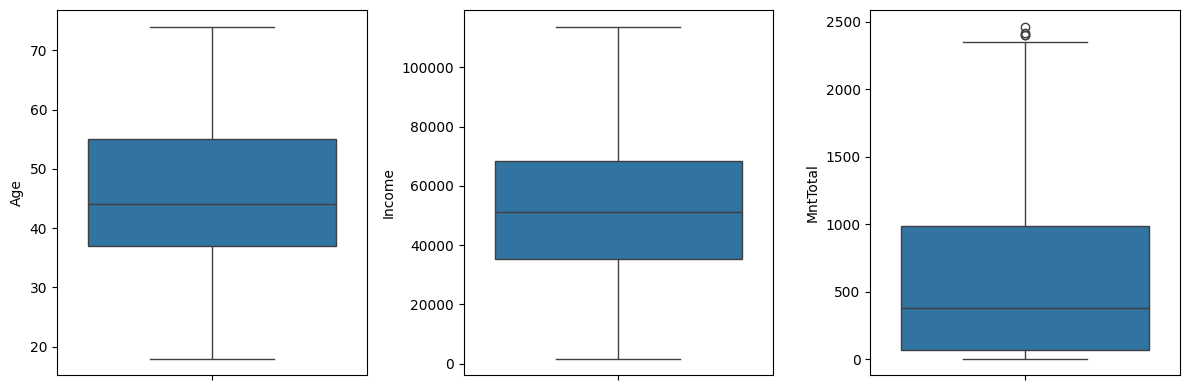

In [33]:
search_outliers = ['Age','Income','MntTotal']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4), tight_layout=True)

for i, colum in enumerate(search_outliers):
    sns.boxplot(y=colum, data=df, ax=axs[i]) 

plt.show()    

## Retirando as colunas que não serão utilizadas

In [34]:
#Retirar as colunas que não serão uteis na análise

df =df.drop(['ID','Year_Birth','Dt_Customer','Z_CostContact','Z_Revenue'], axis=1)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Education            2205 non-null   object  
 1   Marital_Status       2205 non-null   object  
 2   Income               2205 non-null   float64 
 3   Kidhome              2205 non-null   int64   
 4   Teenhome             2205 non-null   int64   
 5   Recency              2205 non-null   int64   
 6   MntWines             2205 non-null   int64   
 7   MntFruits            2205 non-null   int64   
 8   MntMeatProducts      2205 non-null   int64   
 9   MntFishProducts      2205 non-null   int64   
 10  MntSweetProducts     2205 non-null   int64   
 11  MntGoldProds         2205 non-null   int64   
 12  NumDealsPurchases    2205 non-null   int64   
 13  NumWebPurchases      2205 non-null   int64   
 14  NumCatalogPurchases  2205 non-null   int64   
 15  NumStorePurchases    2205 

In [36]:
#Salvar a base já tratada 

df.to_csv('../Data/Customers_new_features_and_drop.csv', index=False)

In [37]:
with pd.option_context(
    "display.float_format", "{:.2f}".format,
    "display.max_columns", None,
):
    
    display(df.describe())


Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
count   2205.00  2205.00   2205.00  2205.00   2205.00    2205.00   
mean   51622.09     0.44      0.51    49.01    306.16      26.40   
std    20713.06     0.54      0.54    28.93    337.49      39.78   
min     1730.00     0.00      0.00     0.00      0.00       0.00   
25%    35196.00     0.00      0.00    24.00     24.00       2.00   
50%    51287.00     0.00      0.00    49.00    178.00       8.00   
75%    68281.00     1.00      1.00    74.00    507.00      33.00   
max   113734.00     2.00      2.00    99.00   1493.00     199.00   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count          2205.00          2205.00           2205.00       2205.00   
mean            165.31            37.76             27.13         44.06   
std             217.78            54.82             41.13         51.74   
min               0.00             0.00              0.00          0.00   
25%              16.00             3.00              1.00          9.00   
50%              68.00            12.00              8.00         25.00   
75%             232.00            50.00             34.00         56.00   
max            1725.00           259.00            262.00        321.00   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count            2205.00          2205.00              2205.00   
mean                2.32             4.10                 2.65   
std                 1.89             2.74                 2.80   
min                 0.00             0.00                 0.00   
25%                 1.00             2.00                 0.00   
50%                 2.00             4.00                 2.00   
75%                 3.00             6.00                 4.00   
max                15.00            27.00                28.00   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count            2205.00            2205.00       2205.00       2205.00   
mean                5.82               5.34          0.07          0.07   
std                 3.24               2.41          0.26          0.26   
min                 0.00               0.00          0.00          0.00   
25%                 3.00               3.00          0.00          0.00   
50%                 5.00               6.00          0.00          0.00   
75%                 8.00               7.00          0.00          0.00   
max                13.00              20.00          1.00          1.00   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
count       2205.00       2205.00       2205.00   2205.00   2205.00   
mean           0.07          0.06          0.01      0.01      0.15   
std            0.26          0.25          0.12      0.09      0.36   
min            0.00          0.00          0.00      0.00      0.00   
25%            0.00          0.00          0.00      0.00      0.00   
50%            0.00          0.00          0.00      0.00      0.00   
75%            0.00          0.00          0.00      0.00      0.00   
max            1.00          1.00          1.00      1.00      1.00   

       DaysSinceEnrolled  YearsSinceEnrolled     Age  MntTotal  MntProds  \
count            2205.00             2205.00 2205.00   2205.00   2205.00   
mean              353.72                0.48   45.10    580.42    536.36   
std               202.56                0.50   11.71    578.08    552.71   
min                 0.00                0.00   18.00      4.00      3.00   
25%               180.00                0.00   37.00     65.00     51.00   
50%               356.00                0.00   44.00    377.00    328.00   
75%               529.00                1.00   55.00    983.00    910.00   
max               699.00                1.00   74.00   2464.00   2319.00   

       Children  HasChildren  AcceptedCmpTotal  HasAcceptedCmp  \
count   2205.00      2205.00           2205.00         220

In [38]:
df.describe(exclude='number')

Education Marital_Status AgeGroup
count         2205           2205     2205
unique           5              2        4
top     Graduation        Partner    31-45
freq          1113           1422      958

## Aprofundando a análise exploratória nas principais colunas

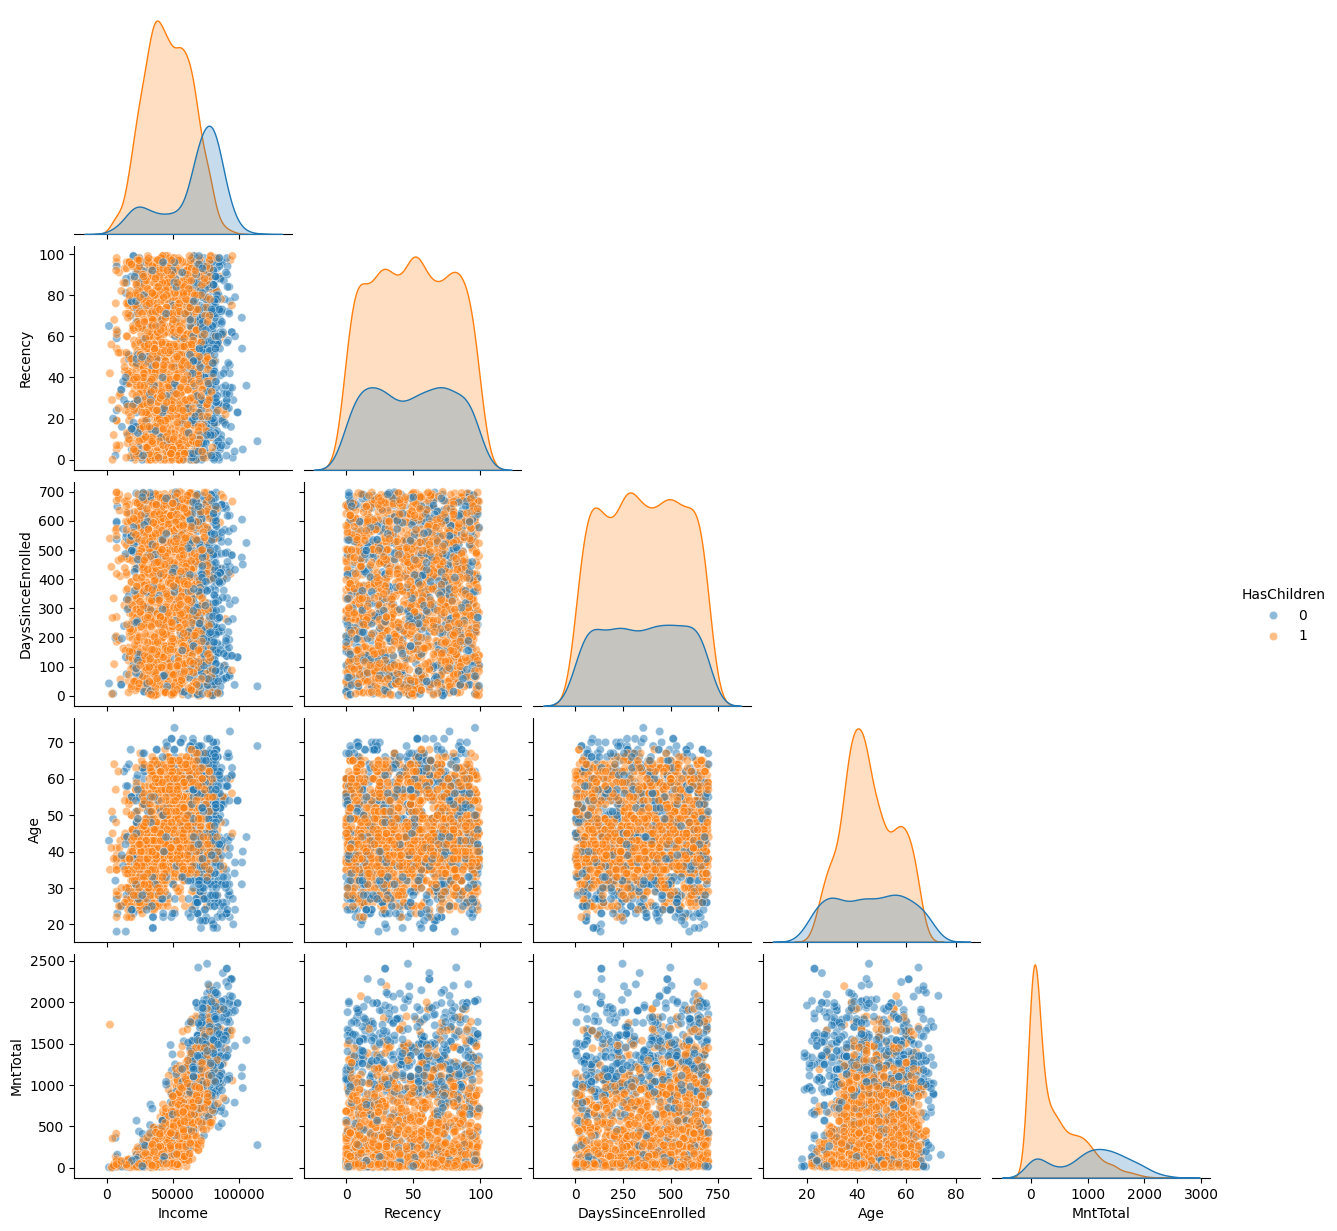

In [39]:
from Funcoes_Auxiliares import pairplot

columns_analysis = ['Income','Recency','DaysSinceEnrolled','Age','MntTotal']

pairplot(df, columns_analysis, 'HasChildren')

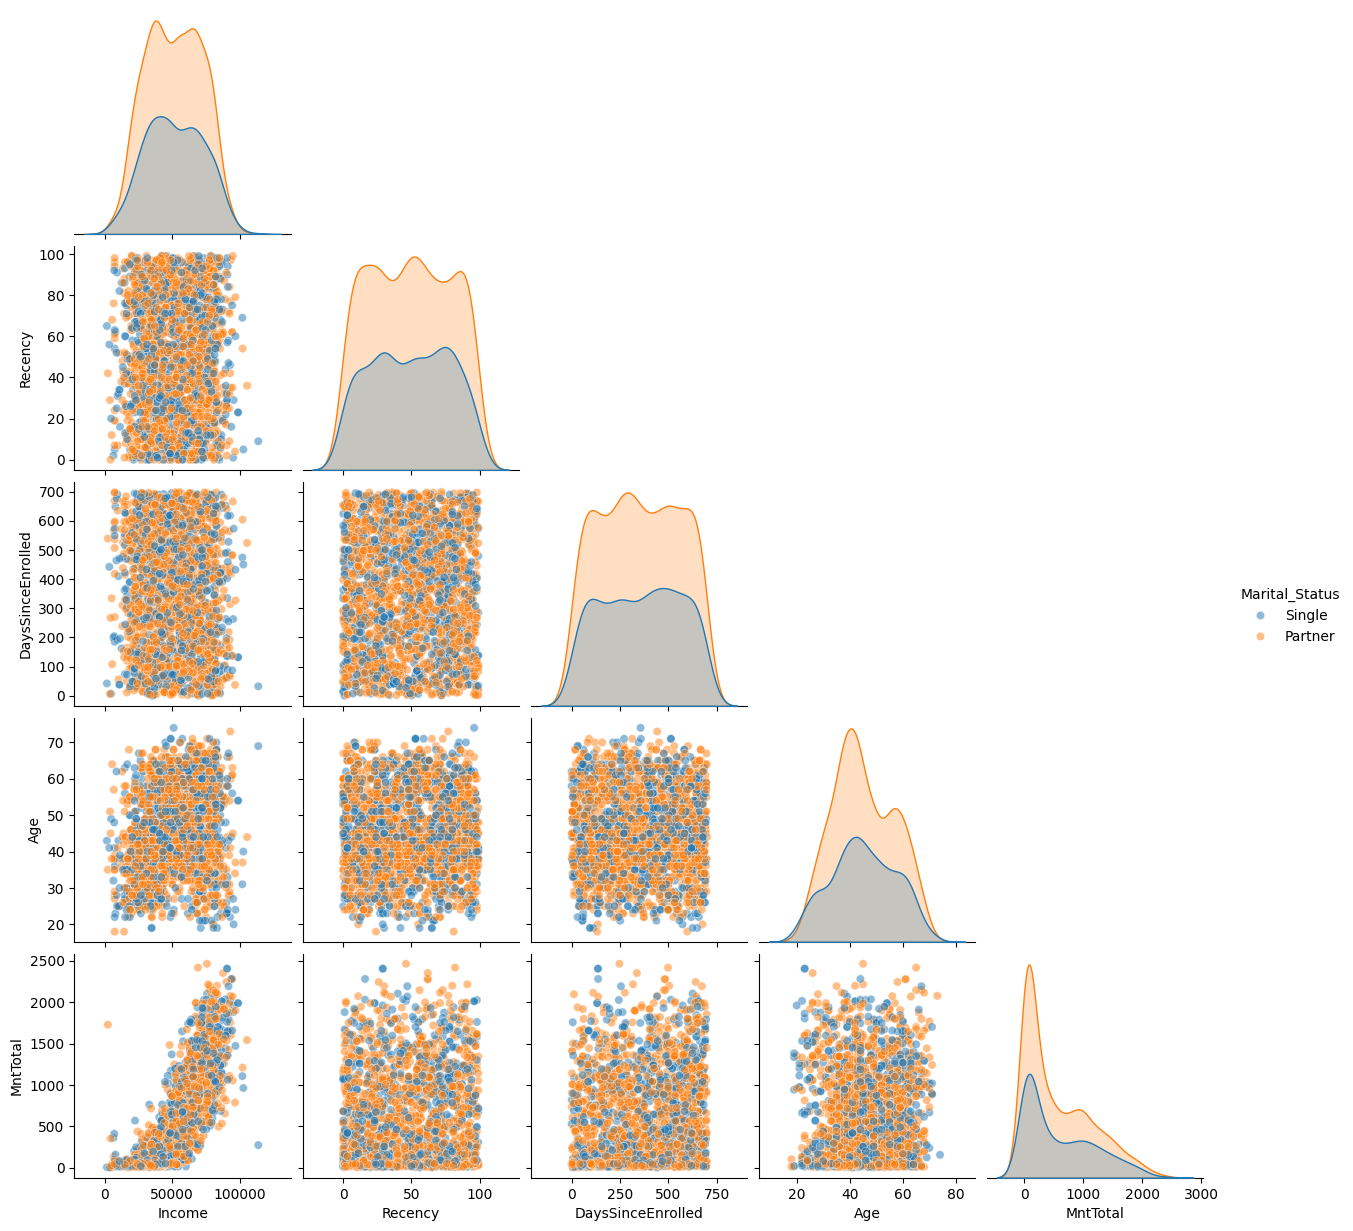

In [40]:
pairplot(df, columns_analysis, 'Marital_Status');

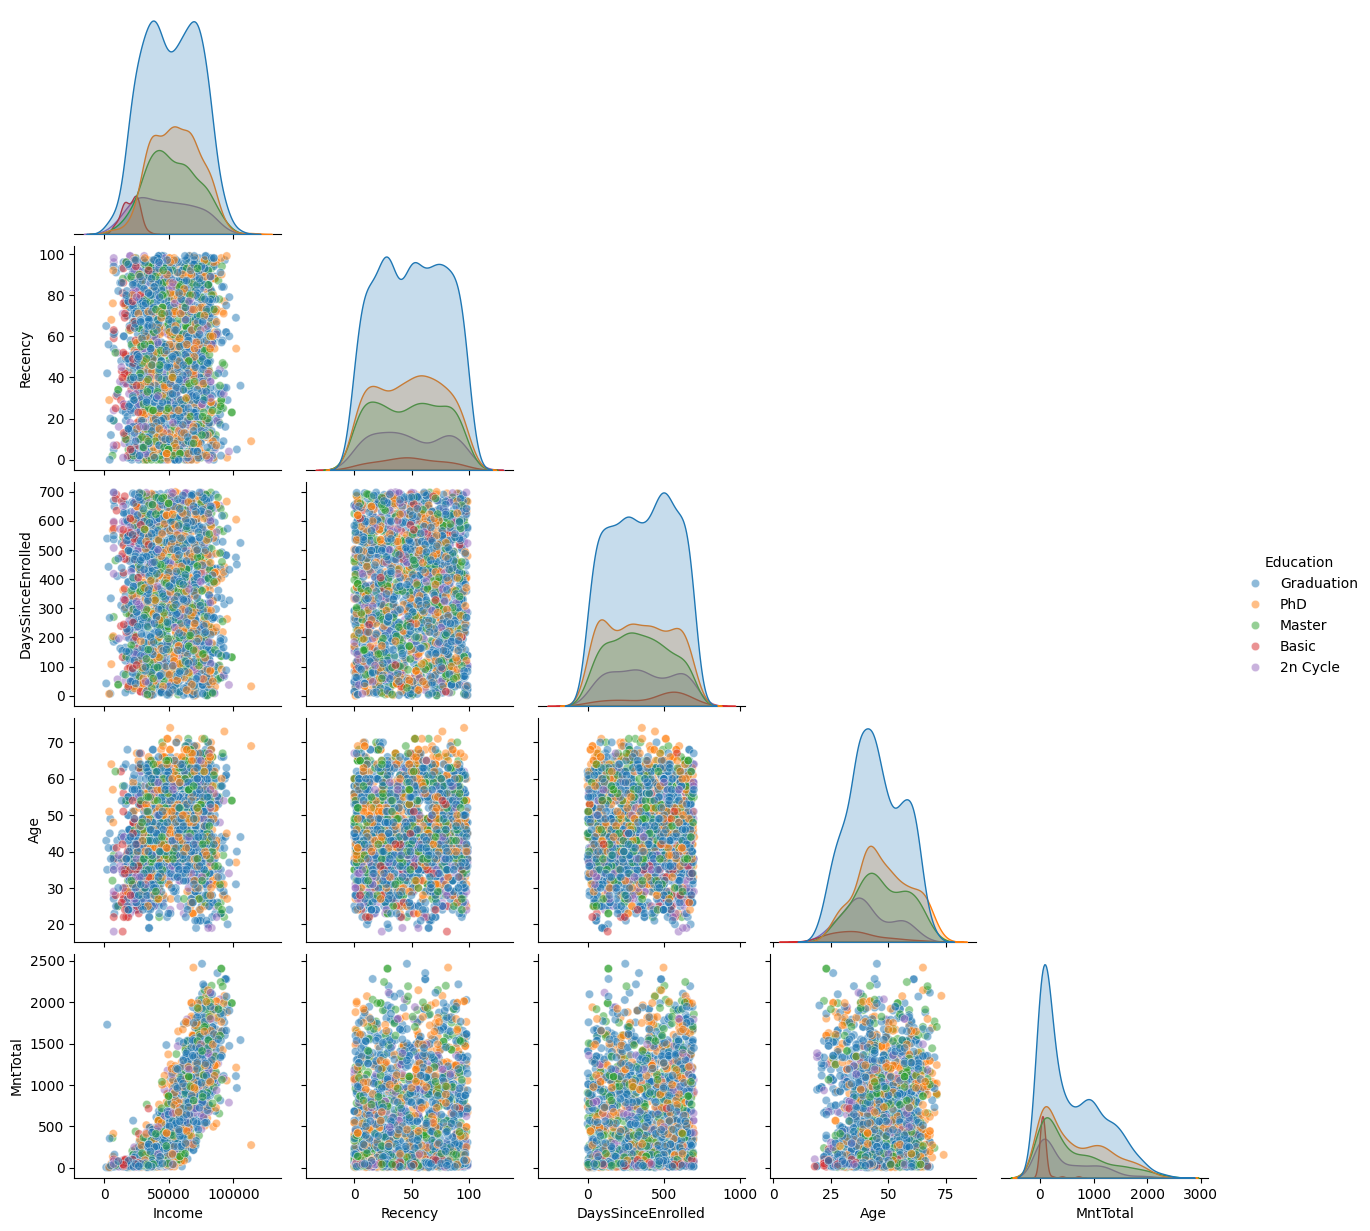

In [41]:
pairplot(df, columns_analysis, 'Education')

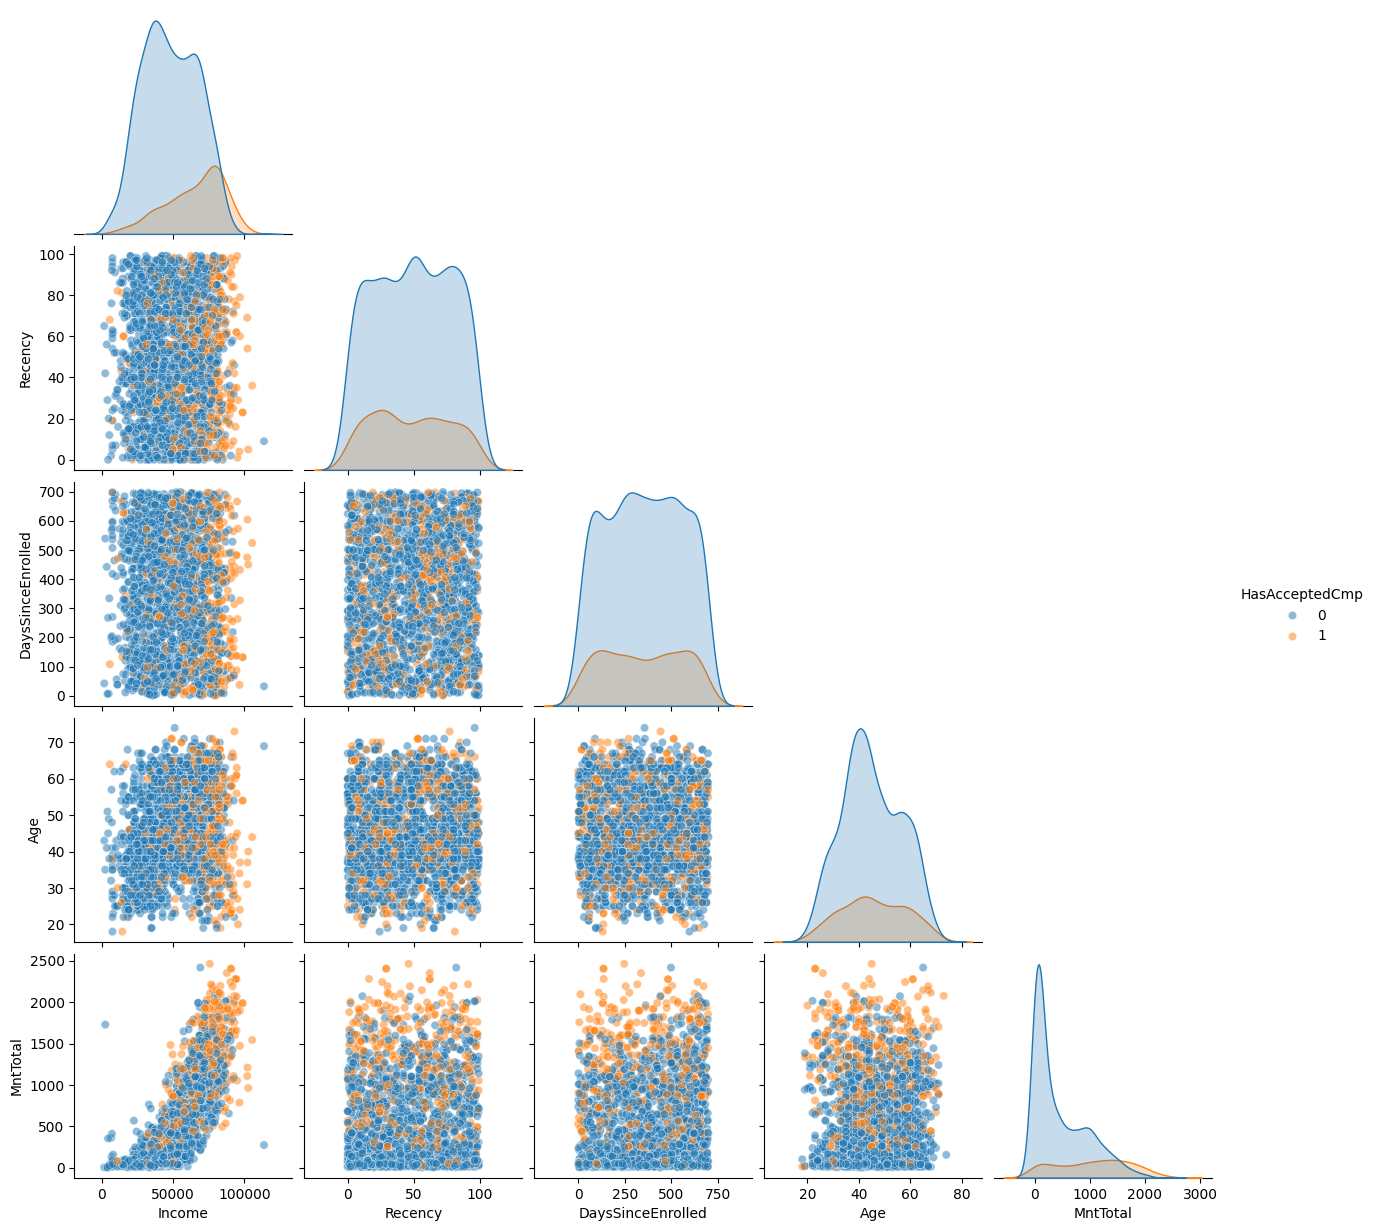

In [42]:
pairplot(df, columns_analysis, 'HasAcceptedCmp')

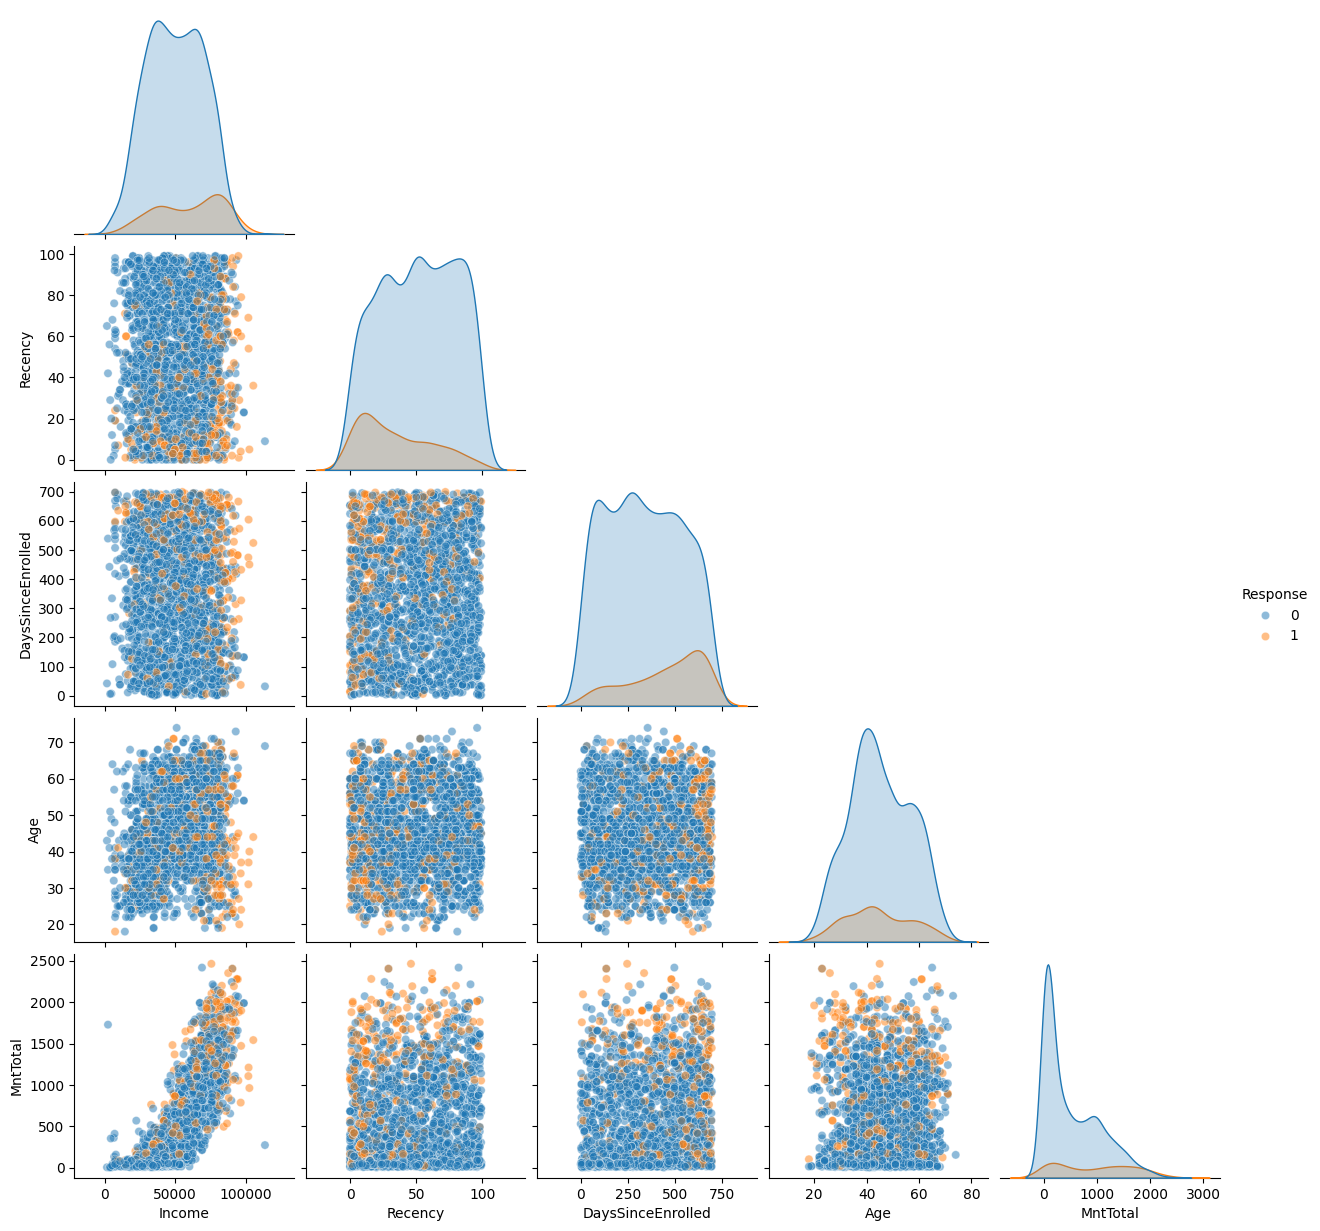

In [43]:
pairplot(df, columns_analysis, 'Response')

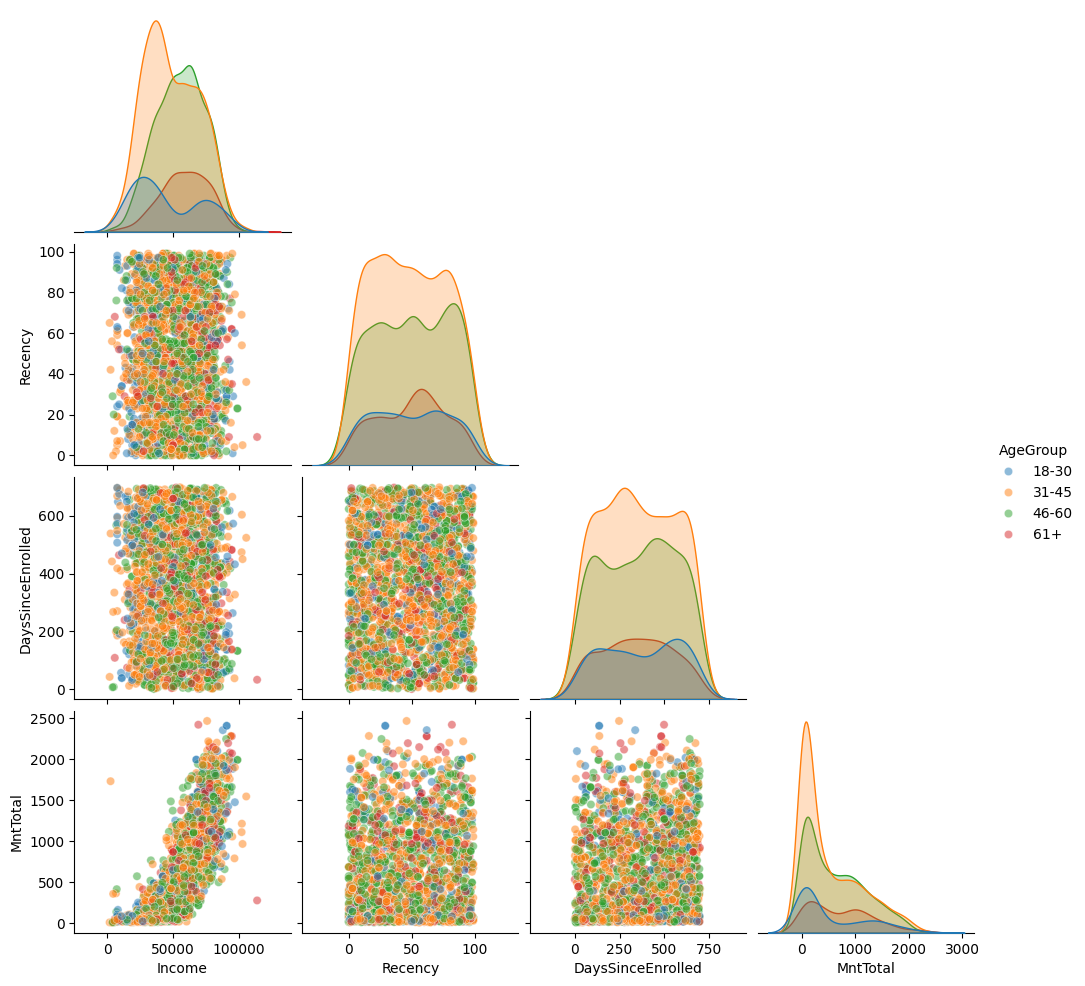

In [44]:
columns_analysis_without_age = ['Income','Recency','DaysSinceEnrolled','MntTotal']

pairplot(df, columns_analysis_without_age, 'AgeGroup')

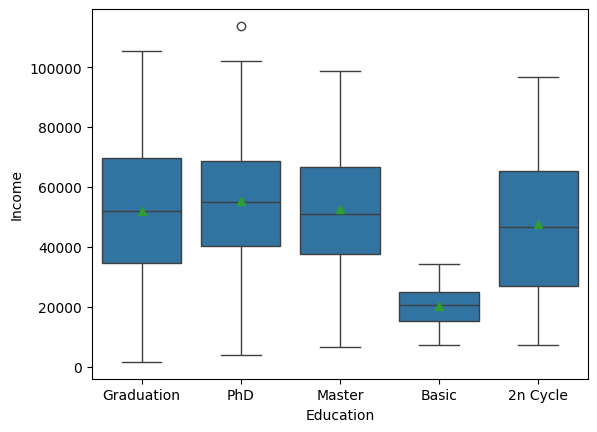

In [45]:
sns.boxplot(x='Education',y='Income', data=df, showmeans=True);

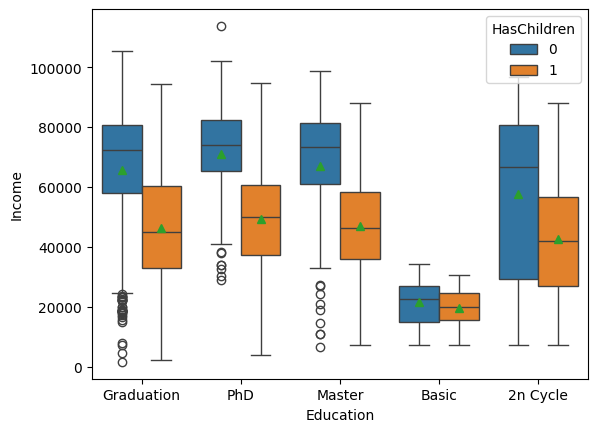

In [46]:
sns.boxplot(x='Education',y='Income', data=df, showmeans=True, hue='HasChildren');

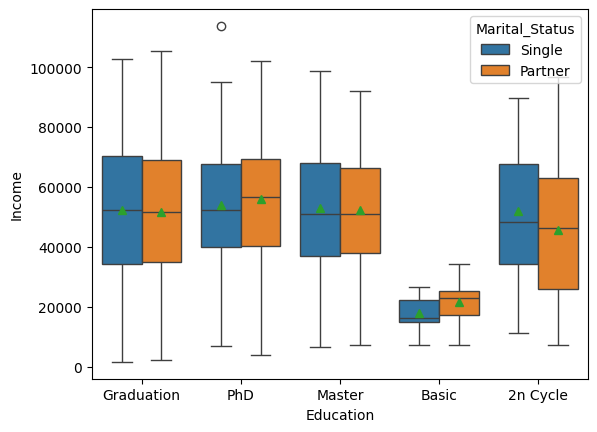

In [47]:
sns.boxplot(x='Education',y='Income', data=df, showmeans=True, hue='Marital_Status');

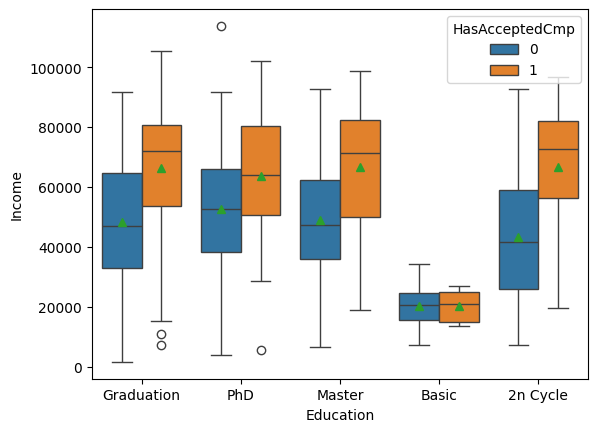

In [48]:
sns.boxplot(x='Education',y='Income', data=df, showmeans=True, hue='HasAcceptedCmp');

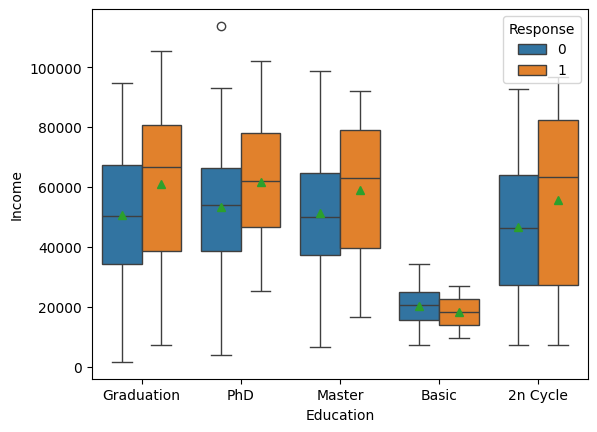

In [49]:
sns.boxplot(x='Education',y='Income', data=df, showmeans=True, hue='Response');

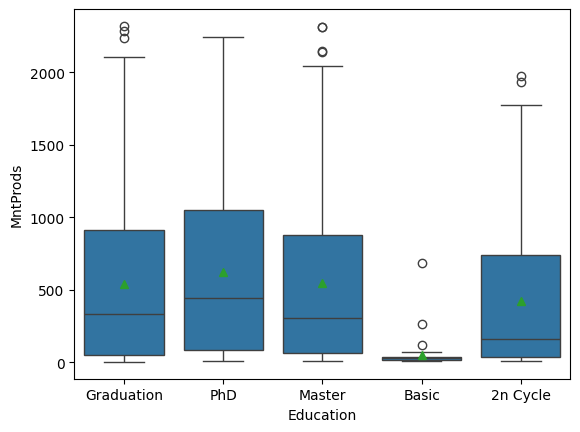

In [50]:
sns.boxplot(x='Education',y='MntProds', data=df, showmeans=True);

In [51]:
sns.boxplot(x='Education',y='MntGoldProds', data=df, showmeans=True);

In [52]:
sns.boxplot(x='AgeGroup',y='Income', data=df, showmeans=True);

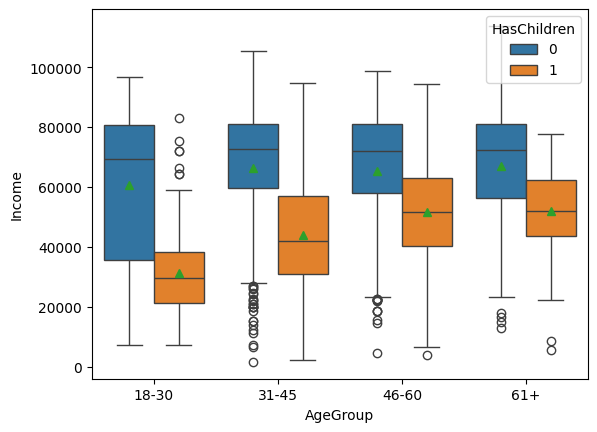

In [53]:
sns.boxplot(x='AgeGroup',y='Income', data=df, showmeans=True, hue='HasChildren');

In [54]:
sns.boxplot(x='AgeGroup',y='Income', data=df, showmeans=True, hue='Marital_Status');

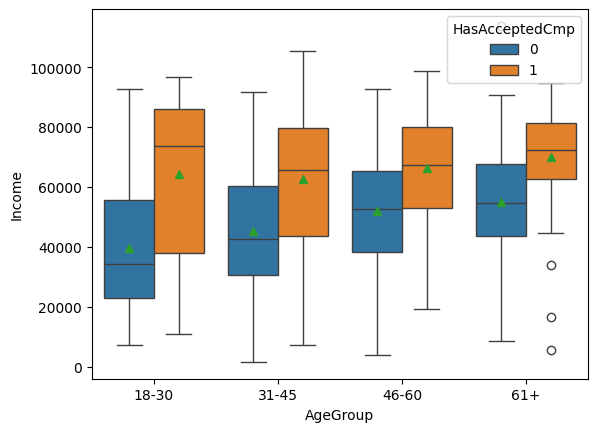

In [55]:
sns.boxplot(x='AgeGroup',y='Income', data=df, showmeans=True, hue='HasAcceptedCmp');

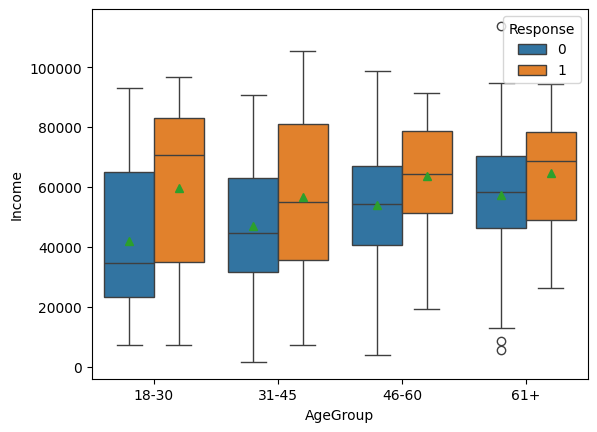

In [56]:
sns.boxplot(x='AgeGroup',y='Income', data=df, showmeans=True, hue='Response');

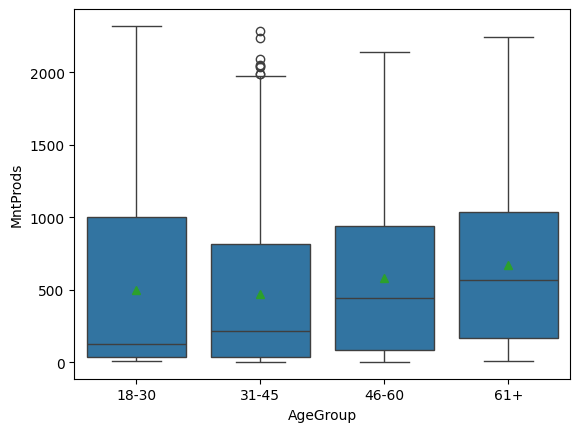

In [57]:
sns.boxplot(x='AgeGroup',y='MntProds', data=df, showmeans=True);

In [58]:
sns.boxplot(x='AgeGroup',y='MntGoldProds', data=df, showmeans=True);

## Convertendo as colunas não numéricas em numéricas

In [59]:
#Converter as colunas não numéricas em numéricas
df_dummies = pd.get_dummies(df,dtype=int)

df_dummies.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Partner  Marital_Status_Single  AgeGroup_18-30  \
0                       0                      1               0   
1                       0                      1               0   
2                       1                      0               0   
3                       1                      0               1   
4                       1                      0               0   

   AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
0               0               1             0  
1               0               1             0  
2               0               1             0  
3               0               0             0  
4               1               0             0  

[5 rows x 43 columns]

In [60]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2205 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Income                  2205 non-null   float64
 1   Kidhome                 2205 non-null   int64  
 2   Teenhome                2205 non-null   int64  
 3   Recency                 2205 non-null   int64  
 4   MntWines                2205 non-null   int64  
 5   MntFruits               2205 non-null   int64  
 6   MntMeatProducts         2205 non-null   int64  
 7   MntFishProducts         2205 non-null   int64  
 8   MntSweetProducts        2205 non-null   int64  
 9   MntGoldProds            2205 non-null   int64  
 10  NumDealsPurchases       2205 non-null   int64  
 11  NumWebPurchases         2205 non-null   int64  
 12  NumCatalogPurchases     2205 non-null   int64  
 13  NumStorePurchases       2205 non-null   int64  
 14  NumWebVisitsMonth       2205 non-null   int64

In [61]:
df_dummies.to_csv('../Data/Customers_new_features_and_drop_dummies.csv', index=False)

## Entendendo a correlação das colunas

In [62]:
df_dummies_corr = df_dummies.corr()

In [63]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(df_dummies_corr, annot=True, ax=ax, fmt='0.1f', cmap='coolwarm_r');

In [64]:
df_dummies_corr.head()

Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
Income    1.000000 -0.531699  0.042483  0.006716  0.730495   0.537920   
Kidhome  -0.531699  1.000000 -0.040207  0.011829 -0.499288  -0.374388   
Teenhome  0.042483 -0.040207  1.000000  0.013881  0.002783  -0.176925   
Recency   0.006716  0.011829  0.013881  1.000000  0.016470  -0.004909   
MntWines  0.730495 -0.499288  0.002783  0.016470  1.000000   0.384947   

          MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Income           0.702500         0.551758          0.555601      0.417653   
Kidhome         -0.445665        -0.389895         -0.379101     -0.356550   
Teenhome        -0.267177        -0.206371         -0.164246     -0.019619   
Recency          0.026138         0.001177          0.025535      0.018558   
MntWines         0.593119         0.395967          0.388613      0.390194   

          ...  Education_Basic  Education_Graduation  Education_Master  \
Income    ...        -0.239604              0.017644          0.021633   
Kidhome   ...         0.055308             -0.001930          0.011482   
Teenhome  ...        -0.120519             -0.024698          0.023806   
Recency   ...        -0.003093              0.031419         -0.025563   
MntWines  ...        -0.140369             -0.060920          0.036403   

          Education_PhD  Marital_Status_Partner  Marital_Status_Single  \
Income         0.091176               -0.012405               0.012405   
Kidhome       -0.042031                0.026868              -0.026868   
Teenhome       0.092901                0.032473              -0.032473   
Recency       -0.009234                0.000364              -0.000364   
MntWines       0.160804               -0.007418               0.007418   

          AgeGroup_18-30  AgeGroup_31-45  AgeGroup_46-60  AgeGroup_61+  
Income         -0.112011       -0.126099        0.123550      0.124547  
Kidhome         0.064113        0.213639       -0.167900     -0.146678  
Teenhome       -0.338075       -0.124902        0.311466      0.073968  
Recency         0.001254       -0.032791        0.027028      0.009705  
MntWines       -0.069436       -0.103705        0.088864      0.098456  

[5 rows x 43 columns]

In [65]:
df_dummies_corr_ustack = pd.DataFrame(df_dummies_corr.unstack())
df_dummies_corr_ustack = df_dummies_corr_ustack.rename(columns={0:'Corr'})
df_dummies_corr_ustack.head(30)

Corr
Income Income               1.000000
       Kidhome             -0.531699
       Teenhome             0.042483
       Recency              0.006716
       MntWines             0.730495
       MntFruits            0.537920
       MntMeatProducts      0.702500
       MntFishProducts      0.551758
       MntSweetProducts     0.555601
       MntGoldProds         0.417653
       NumDealsPurchases   -0.132427
       NumWebPurchases      0.503184
       NumCatalogPurchases  0.710057
       NumStorePurchases    0.687206
       NumWebVisitsMonth   -0.648306
       AcceptedCmp3        -0.011181
       AcceptedCmp4         0.233267
       AcceptedCmp5         0.416386
       AcceptedCmp1         0.345242
       AcceptedCmp2         0.110210
       Complain            -0.027488
       Response             0.174902
       DaysSinceEnrolled   -0.024892
       YearsSinceEnrolled  -0.002489
       Age                  0.212625
       MntTotal             0.820370
       MntProds             0.818939
       Children            -0.350313
       HasChildren         -0.410545
       AcceptedCmpTotal     0.388247

In [66]:
df_dummies_corr_ustack.loc['Income'].sort_values(by='Corr')

Corr
NumWebVisitsMonth      -0.648306
Kidhome                -0.531699
HasChildren            -0.410545
Children               -0.350313
Education_Basic        -0.239604
NumDealsPurchases      -0.132427
AgeGroup_31-45         -0.126099
AgeGroup_18-30         -0.112011
Education_2n Cycle     -0.060621
Complain               -0.027488
DaysSinceEnrolled      -0.024892
Marital_Status_Partner -0.012405
AcceptedCmp3           -0.011181
YearsSinceEnrolled     -0.002489
Recency                 0.006716
Marital_Status_Single   0.012405
Education_Graduation    0.017644
Education_Master        0.021633
Teenhome                0.042483
Education_PhD           0.091176
AcceptedCmp2            0.110210
AgeGroup_46-60          0.123550
AgeGroup_61+            0.124547
Response                0.174902
Age                     0.212625
AcceptedCmp4            0.233267
HasAcceptedCmp          0.336105
AcceptedCmp1            0.345242
AcceptedCmpTotal        0.388247
AcceptedCmp5            0.416386
MntGoldProds            0.417653
NumWebPurchases         0.503184
MntFruits               0.537920
MntFishProducts         0.551758
MntSweetProducts        0.555601
NumStorePurchases       0.687206
MntMeatProducts         0.702500
NumCatalogPurchases     0.710057
MntWines                0.730495
NumTotalPurchases       0.778849
MntProds                0.818939
MntTotal                0.820370
Income                  1.000000

In [67]:
df_dummies_corr_ustack.loc['Age'].sort_values(by='Corr')

Corr
AgeGroup_18-30         -0.580462
AgeGroup_31-45         -0.464348
Kidhome                -0.238083
NumWebVisitsMonth      -0.122713
Education_Basic        -0.115872
Education_2n Cycle     -0.104364
Education_Graduation   -0.061579
AcceptedCmp3           -0.061405
Response               -0.021305
AcceptedCmp5           -0.019275
DaysSinceEnrolled      -0.013462
HasChildren            -0.012013
Marital_Status_Single  -0.003800
AcceptedCmpTotal        0.001529
Marital_Status_Partner  0.003800
YearsSinceEnrolled      0.003869
Complain                0.004531
AcceptedCmp2            0.007737
AcceptedCmp1            0.011747
MntFruits               0.013149
Recency                 0.014228
MntSweetProducts        0.021075
HasAcceptedCmp          0.030203
MntFishProducts         0.040855
MntMeatProducts         0.041540
MntGoldProds            0.059295
AcceptedCmp4            0.069903
NumDealsPurchases       0.072005
Education_Master        0.074754
Children                0.093007
MntTotal                0.122332
MntProds                0.122398
Education_PhD           0.123429
NumStorePurchases       0.138614
NumCatalogPurchases     0.140724
NumWebPurchases         0.161839
MntWines                0.164438
NumTotalPurchases       0.179130
Income                  0.212625
Teenhome                0.362919
AgeGroup_46-60          0.469812
AgeGroup_61+            0.603412
Age                     1.000000

In [68]:
df_dummies_corr_ustack.loc['Recency'].sort_values(by='Corr')

Corr
Response               -0.200413
AgeGroup_31-45         -0.032791
AcceptedCmp3           -0.032327
Education_Master       -0.025563
AcceptedCmp1           -0.021097
NumWebVisitsMonth      -0.017906
HasAcceptedCmp         -0.016200
AcceptedCmpTotal       -0.013344
Education_PhD          -0.009234
Education_2n Cycle     -0.006789
NumWebPurchases        -0.005104
MntFruits              -0.004909
Education_Basic        -0.003093
AcceptedCmp2           -0.001390
Marital_Status_Single  -0.000364
AcceptedCmp5            0.000334
Marital_Status_Partner  0.000364
NumStorePurchases       0.000462
NumDealsPurchases       0.000479
MntFishProducts         0.001177
AgeGroup_18-30          0.001254
HasChildren             0.002109
Complain                0.005758
Income                  0.006716
AgeGroup_61+            0.009705
NumTotalPurchases       0.009858
Kidhome                 0.011829
Teenhome                0.013881
Age                     0.014228
MntWines                0.016470
AcceptedCmp4            0.017658
MntGoldProds            0.018558
Children                0.018566
MntProds                0.022374
MntTotal                0.023052
MntSweetProducts        0.025535
MntMeatProducts         0.026138
AgeGroup_46-60          0.027028
DaysSinceEnrolled       0.028338
NumCatalogPurchases     0.029750
YearsSinceEnrolled      0.030129
Education_Graduation    0.031419
Recency                 1.000000

In [69]:
df_dummies_corr_ustack.loc['MntTotal'].sort_values(by='Corr')

Corr
Kidhome                -0.555251
HasChildren            -0.516167
Children               -0.494007
NumWebVisitsMonth      -0.493210
Education_Basic        -0.139743
Teenhome               -0.132044
AgeGroup_31-45         -0.100927
NumDealsPurchases      -0.072795
Education_2n Cycle     -0.060082
Complain               -0.035345
AgeGroup_18-30         -0.023115
Marital_Status_Partner -0.021578
Education_Master        0.007255
Education_Graduation    0.018162
Marital_Status_Single   0.021578
Recency                 0.023052
AcceptedCmp3            0.054618
AgeGroup_46-60          0.060045
Education_PhD           0.065630
AgeGroup_61+            0.090148
Age                     0.122332
AcceptedCmp2            0.143115
YearsSinceEnrolled      0.148057
DaysSinceEnrolled       0.159684
AcceptedCmp4            0.259892
Response                0.268041
AcceptedCmp1            0.385130
HasAcceptedCmp          0.421318
AcceptedCmpTotal        0.466311
AcceptedCmp5            0.475199
MntGoldProds            0.524451
NumWebPurchases         0.534782
MntFruits               0.570721
MntSweetProducts        0.594813
MntFishProducts         0.629975
NumStorePurchases       0.678561
NumCatalogPurchases     0.795054
NumTotalPurchases       0.820121
Income                  0.820370
MntMeatProducts         0.852711
MntWines                0.907390
MntProds                0.996819
MntTotal                1.000000

In [70]:
df_dummies_corr_ustack.loc['Response'].sort_values(by='Corr')

Corr
HasChildren            -0.205308
Recency                -0.200413
Children               -0.168976
Teenhome               -0.155196
Marital_Status_Partner -0.150202
Kidhome                -0.078409
Education_Basic        -0.050437
Education_Graduation   -0.040749
AgeGroup_46-60         -0.039852
Education_2n Cycle     -0.035008
Age                    -0.021305
NumWebVisitsMonth      -0.005358
Complain               -0.000273
Education_Master        0.003509
NumDealsPurchases       0.004691
AgeGroup_61+            0.008916
AgeGroup_31-45          0.011045
AgeGroup_18-30          0.032317
NumStorePurchases       0.033509
Education_PhD           0.089627
MntFishProducts         0.107405
MntSweetProducts        0.115326
MntFruits               0.122331
MntGoldProds            0.140210
NumWebPurchases         0.149699
Marital_Status_Single   0.150202
NumTotalPurchases       0.163609
AcceptedCmp2            0.169128
YearsSinceEnrolled      0.174524
Income                  0.174902
AcceptedCmp4            0.179727
DaysSinceEnrolled       0.196520
NumCatalogPurchases     0.234524
MntWines                0.245559
MntMeatProducts         0.248821
AcceptedCmp3            0.253576
MntProds                0.267223
MntTotal                0.268041
AcceptedCmp1            0.296978
AcceptedCmp5            0.324648
HasAcceptedCmp          0.367892
AcceptedCmpTotal        0.426961
Response                1.000000

In [77]:
response_corr = df_dummies_corr_ustack.loc['Response'].sort_values(by='Corr')[:-1]

In [78]:
from matplotlib.colors import CenteredNorm, ListedColormap
from matplotlib.cm import ScalarMappable

cmap = 'coolwarm_r'
cnorm = CenteredNorm(vcenter=0, halfrange=0.5)
smap = ScalarMappable(norm=cnorm, cmap=cmap)

listed_colors = ListedColormap([smap.to_rgba(x) for x in response_corr['Corr']]).colors

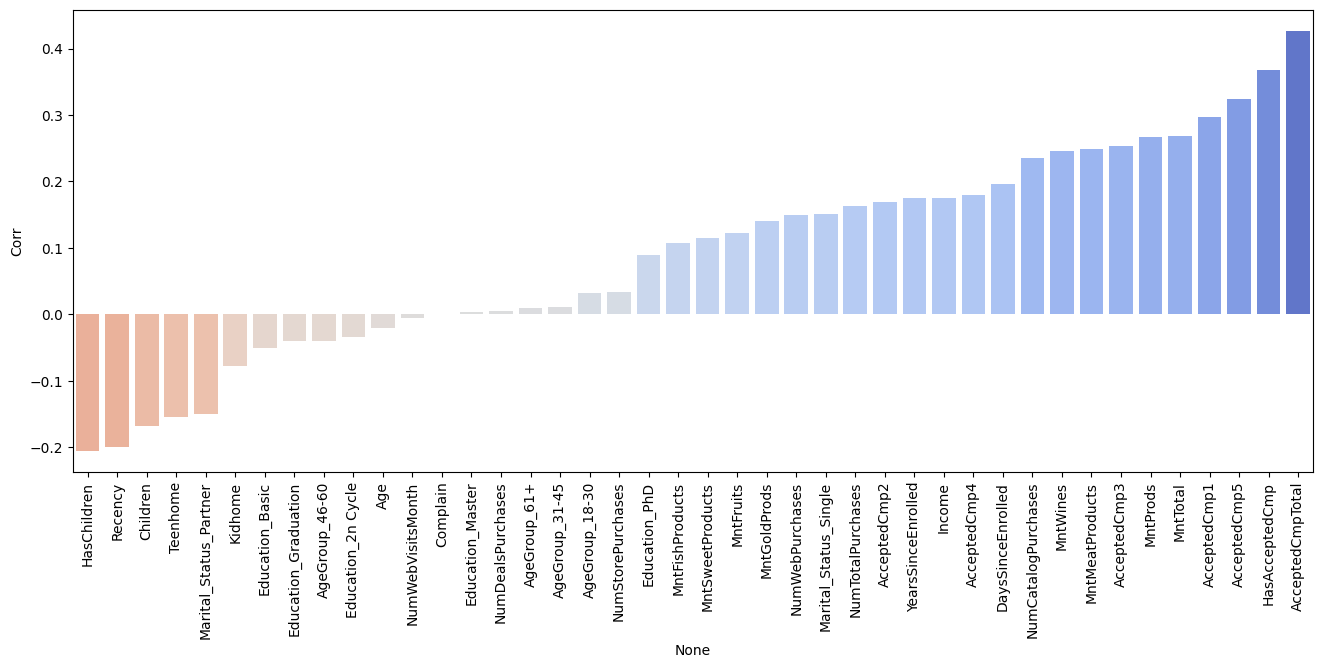

In [79]:

fig, ax = plt.subplots(figsize=(16,6))

b = sns.barplot(x=response_corr.index, y =response_corr['Corr'], hue=response_corr.index, palette =listed_colors, legend=False)

b.tick_params(axis='x',rotation=90)

plt.show()